In [2]:
"""
PIB Estadual (valor adicionado a preços básicos) - agropecuária (preços de 2010)
Fonte: Instituto Brasileiro de Geografia e Estatística
Frequência: Anual de 1939 até 2022
Unidade: R$ (mil), a preços do ano 2010 ( )

Comentário: O produto interno bruto (PIB) é o total dos bens e serviços produzidos pelas 
unidades produtoras residentes destinados ao consumo final, sendo equivalente à soma dos 
valores adicionados pelas diversas atividades econômicas acrescida dos impostos, líquidos 
de subsídios, sobre produtos. Equivale também à soma dos consumos finais de bens e serviços 
valorados a preço de mercado, sendo também equivalente à soma das rendas primárias. 
Neste caso é a medição do PIB de um determinado Estado. Valor adicionado bruto é o valor que 
a atividade agrega aos bens e serviços consumidos no seu processo produtivo. O setor 
agropecuário refere-se ao cálculo do PIB pela ótica contábil da produção e compreende os 
estabelecimentos agropecuários com produção para o mercado e para o próprio consumo. 
A abrangência desta atividade abrange os seguintes segmentos: agricultura, pecuária, produção 
florestal, pesca e aquicultura. 

Fontes: Para 2002-2006: Sistema de Contas Regionais Referência 2002. 
Para 1985-2001: Antigo Sistema de Contas Regionais. Conceito utilizado a partir de 1985 a preços básicos. 
Para os anos de 1970, 1975 e 1980, Produto Interno Bruto a custo de fatores elaborado pelo 
IBGE. Para os anos de 1939, 1947 a 1969, Produto Interno Líquido a custo de fatores 
elaborado pela FGV, neste período os dados referentes aos territórios de Rondônia e Roraima e 
ao estado do Acre estão incluídos no estado do Amazonas e o território do Amapá está incluído 
no Pará. Mais Informações: CNAE 2.0; Contas Nacionais número 6, Contas Regionais do Brasil 
1999; Sistema de Contas Nacionais Brasil Conceitos, 3a Edição, 2010; "Contabilidade Social" 
Feijo, Carmem & Ramos, Roberto, 4a edição, 2013, Ed. Campus, Rio de Janeiro. 
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from collections import Counter

In [3]:


pib_agro_data = pd.read_json("data/ipeadata_pib_agro.json")

pib_agro_data

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
Sigla,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
1939,,356447.048837,473196.372079,,1827436.862696,959049.197341,0.0,675699.623012,876653.104168,749313.687446,...,1486229.216672,1442835.6629,342757.415802,,,4108956.270214,1110410.045616,234790.121299,7474797.932093,
1947,,579641.699078,556324.932831,,2513903.239652,1045508.815865,0.0,702405.877994,716171.197827,437119.135912,...,2439364.500966,1865341.299779,574304.126082,,,5281294.375816,2051126.296705,294783.856009,11869638.644319,
1948,,612951.719865,468930.610438,,2641182.702907,1173475.865826,,752110.238121,825225.927192,557695.002006,...,3009501.881467,2089411.221055,620997.097986,,,5240989.175481,2009134.26135,325351.554753,13778107.879308,
1949,,635635.36789,476767.345039,,2530867.202664,1325070.338584,,1151833.984787,915654.544856,461011.163945,...,3310594.071238,2354365.319107,681516.061025,,,5687736.460425,1926744.196964,357330.594047,14849261.84187,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,587129.627902,5315221.719039,2792752.462146,174925.588201,9826032.84239,4135406.139545,557595.539679,2332818.764764,11898315.145459,4114217.493305,...,19293072.335988,1703176.995794,1513704.616175,3288515.429328,403434.386536,20375662.083619,8543018.200459,1144890.918971,18583667.065417,2830080.798748
2020,519022.524699,6660980.626759,2698960.717523,179372.781242,14779621.437652,5018012.47439,856993.61342,2756413.34874,15315580.9079,6106930.63056,...,29812539.262821,1949599.955053,1588726.12644,3636687.016776,528191.53635,19078044.60058,10239106.815227,1363273.454705,23425811.558293,4239209.553761
2021,1723605.417278,7973781.882265,2668287.843792,164103.989497,16136617.801809,4932373.628186,1083544.946336,3323592.222559,20106673.698734,6579053.355488,...,29238503.155712,2073075.337212,1488548.339182,5013240.404583,584847.659239,35519222.529242,11102575.317076,1306979.146856,21886262.607095,6331975.459783
2022,2007001.481081,4966470.706589,2445522.497746,104737.684572,17222021.842731,4636006.039336,596895.800339,3767784.556474,22706970.682239,7234182.959308,...,23952751.211057,1866106.016937,1302496.261843,4917962.111352,747270.114922,19122711.143552,9957607.822018,1188115.743608,18226919.8851,5393474.903676


Os dados como vieram possuem a sigla como um indice, o que dificulta as análises e não será utilizada para nada. Dessa forma, pode-se eliminá-la econverter os anos para o tipo inteiro.

In [4]:
estados_siglas = pib_agro_data.loc["Sigla"]
estados_siglas
pib_agro_data = pib_agro_data.drop(index='Sigla')
pib_agro_data

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
1939,,356447.048837,473196.372079,,1827436.862696,959049.197341,0.0,675699.623012,876653.104168,749313.687446,...,1486229.216672,1442835.6629,342757.415802,,,4108956.270214,1110410.045616,234790.121299,7474797.932093,
1947,,579641.699078,556324.932831,,2513903.239652,1045508.815865,0.0,702405.877994,716171.197827,437119.135912,...,2439364.500966,1865341.299779,574304.126082,,,5281294.375816,2051126.296705,294783.856009,11869638.644319,
1948,,612951.719865,468930.610438,,2641182.702907,1173475.865826,,752110.238121,825225.927192,557695.002006,...,3009501.881467,2089411.221055,620997.097986,,,5240989.175481,2009134.26135,325351.554753,13778107.879308,
1949,,635635.36789,476767.345039,,2530867.202664,1325070.338584,,1151833.984787,915654.544856,461011.163945,...,3310594.071238,2354365.319107,681516.061025,,,5687736.460425,1926744.196964,357330.594047,14849261.84187,
1950,,660906.767113,462956.911234,,2901965.865982,1831523.174479,,1164772.316239,1318516.867436,646895.933256,...,4470804.636709,2585186.157178,802438.66634,,,5775235.746043,1893110.904053,307489.102396,15913834.761145,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,587129.627902,5315221.719039,2792752.462146,174925.588201,9826032.84239,4135406.139545,557595.539679,2332818.764764,11898315.145459,4114217.493305,...,19293072.335988,1703176.995794,1513704.616175,3288515.429328,403434.386536,20375662.083619,8543018.200459,1144890.918971,18583667.065417,2830080.798748
2020,519022.524699,6660980.626759,2698960.717523,179372.781242,14779621.437652,5018012.47439,856993.61342,2756413.34874,15315580.9079,6106930.63056,...,29812539.262821,1949599.955053,1588726.12644,3636687.016776,528191.53635,19078044.60058,10239106.815227,1363273.454705,23425811.558293,4239209.553761
2021,1723605.417278,7973781.882265,2668287.843792,164103.989497,16136617.801809,4932373.628186,1083544.946336,3323592.222559,20106673.698734,6579053.355488,...,29238503.155712,2073075.337212,1488548.339182,5013240.404583,584847.659239,35519222.529242,11102575.317076,1306979.146856,21886262.607095,6331975.459783
2022,2007001.481081,4966470.706589,2445522.497746,104737.684572,17222021.842731,4636006.039336,596895.800339,3767784.556474,22706970.682239,7234182.959308,...,23952751.211057,1866106.016937,1302496.261843,4917962.111352,747270.114922,19122711.143552,9957607.822018,1188115.743608,18226919.8851,5393474.903676


In [5]:
# Valores nulos
pib_agro_data[(pib_agro_data.eq('').any(axis=1)) | (pib_agro_data.eq(0).any(axis=1))].index

Index(['1939', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954',
       '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1975', '1985',
       '1986', '1987', '1988', ''],
      dtype='object')

Em cada um dos anos listados há ao menos um valor nulo em um dos estados. Além disso, há um ano vazio que não possui informações relevantes para a análise. Ele também será removido.

In [6]:
pib_agro_data = pib_agro_data.drop(index='')
pib_agro_data

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
1939,,356447.048837,473196.372079,,1827436.862696,959049.197341,0.0,675699.623012,876653.104168,749313.687446,...,1486229.216672,1442835.6629,342757.415802,,,4108956.270214,1110410.045616,234790.121299,7474797.932093,
1947,,579641.699078,556324.932831,,2513903.239652,1045508.815865,0.0,702405.877994,716171.197827,437119.135912,...,2439364.500966,1865341.299779,574304.126082,,,5281294.375816,2051126.296705,294783.856009,11869638.644319,
1948,,612951.719865,468930.610438,,2641182.702907,1173475.865826,,752110.238121,825225.927192,557695.002006,...,3009501.881467,2089411.221055,620997.097986,,,5240989.175481,2009134.26135,325351.554753,13778107.879308,
1949,,635635.36789,476767.345039,,2530867.202664,1325070.338584,,1151833.984787,915654.544856,461011.163945,...,3310594.071238,2354365.319107,681516.061025,,,5687736.460425,1926744.196964,357330.594047,14849261.84187,
1950,,660906.767113,462956.911234,,2901965.865982,1831523.174479,,1164772.316239,1318516.867436,646895.933256,...,4470804.636709,2585186.157178,802438.66634,,,5775235.746043,1893110.904053,307489.102396,15913834.761145,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,709515.95527,4758059.976493,3229545.899081,172173.994757,11182638.621899,4153276.35468,598891.860752,2566802.129073,11656674.456013,4555288.176804,...,21295474.331462,1737309.399044,1520679.282537,3356517.127087,375273.732642,20843203.052719,8005884.9164,831727.980201,18515419.849304,2454977.546514
2019,587129.627902,5315221.719039,2792752.462146,174925.588201,9826032.84239,4135406.139545,557595.539679,2332818.764764,11898315.145459,4114217.493305,...,19293072.335988,1703176.995794,1513704.616175,3288515.429328,403434.386536,20375662.083619,8543018.200459,1144890.918971,18583667.065417,2830080.798748
2020,519022.524699,6660980.626759,2698960.717523,179372.781242,14779621.437652,5018012.47439,856993.61342,2756413.34874,15315580.9079,6106930.63056,...,29812539.262821,1949599.955053,1588726.12644,3636687.016776,528191.53635,19078044.60058,10239106.815227,1363273.454705,23425811.558293,4239209.553761
2021,1723605.417278,7973781.882265,2668287.843792,164103.989497,16136617.801809,4932373.628186,1083544.946336,3323592.222559,20106673.698734,6579053.355488,...,29238503.155712,2073075.337212,1488548.339182,5013240.404583,584847.659239,35519222.529242,11102575.317076,1306979.146856,21886262.607095,6331975.459783


In [7]:

pib_agro_data.index = [int(idx) for idx in pib_agro_data.index]
pib_agro_data[(pib_agro_data.eq('').any(axis=1)) | (pib_agro_data.eq(0).any(axis=1))].index.max()

# Nenhum dos pibs maiores do que 1988 está vazio, o que indica que podemos trabalhar come eles com mais facilidade
# Provavelmete após a constituição de 88 há uma merlhor consolidação dos estados e políticas de coleta de dados

np.int64(1988)

Nenhum dos PIBs maiores do que 1988 está vazio, o que indica que podemos trabalhar come eles com mais facilidade.

Provavelmete após a constituição de 88 há uma merlhor consolidação dos estados e de políticas de coleta de dados.

In [8]:
(pib_agro_data.eq('') | pib_agro_data.eq(0)).sum()


Acre                   24
Alagoas                 0
Amazonas                0
Amapá                  24
Bahia                   0
Ceará                   0
Distrito Federal       17
Espírito Santo          0
Goiás                   0
Maranhão                0
Minas Gerais            0
Mato Grosso do Sul     25
Mato Grosso             0
Pará                    0
Paraíba                 0
Pernambuco              0
Piauí                   0
Paraná                  0
Rio de Janeiro          0
Rio Grande do Norte     0
Rondônia               24
Roraima                24
Rio Grande do Sul       0
Santa Catarina          0
Sergipe                 0
São Paulo               0
Tocantins              30
dtype: int64

Os estados do norte e centro-oeste são os que possuem maior quantidade de valores nulos
Isso pode indicar coleta tardia dos dados, considerando que a maioria dos outros estados possuem todos os dados
Pode ser por negligência ou pelos estados terem se formado após as datas onde nulas.

Dada a maior consistência dos dados após 1988, apenas estes serão considerados. Se fosse feita uma substituição por 0 por exemplo, isso poderia afetar a média observada.

In [9]:
# Vou trabalhar com dados após 88, é amplo o bastante e estão mais consistentes
# Média de cada estado
pib_pos_1988 = pib_agro_data.loc[1989:]
pib_pos_1988

,Acre,Alagoas,Amazonas,Amapá,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Paraná,Rio de Janeiro,Rio Grande do Norte,Rondônia,Roraima,Rio Grande do Sul,Santa Catarina,Sergipe,São Paulo,Tocantins
1989,233791.012498,3077828.852538,2618108.799509,372950.578036,18693935.239808,5096060.416194,264653.616472,6193811.97871,4145061.623812,5019630.931397,...,20860684.638994,4092616.312818,4116425.890888,2831534.945189,80452.294529,32806825.871062,19766877.957227,1280721.659897,35102760.261372,956079.972278
1990,169594.89767,3205864.376549,2588857.927622,156878.355086,9411873.159644,4363648.287461,307955.97,2086614.717112,4922679.140756,3343230.878123,...,15081771.431336,2500535.004322,1080769.21269,1232767.000883,65806.437804,19695254.029328,10022104.381499,1236212.76095,34037233.316195,603245.001482
1991,153797.333681,1669929.222033,1369402.065003,137465.464924,4224823.100245,4247090.016543,780358.704971,2084982.230974,2212393.034119,2960665.31102,...,4438213.810012,2150010.233082,1324580.240631,1310681.293626,70640.158789,7798497.68119,3608241.648342,1107322.009873,14982345.00221,681108.459832
1992,66121.740701,882222.242462,624871.281588,71855.857533,4099548.803004,1929951.285688,186264.915924,956394.927005,2078197.720364,1243961.82557,...,4919045.719079,626098.409871,525138.19509,561236.808929,17784.882023,8578042.935269,4479728.86156,527444.951255,15920191.752203,346765.860958
1993,76104.566861,544381.043128,411675.803179,75433.915466,4152732.42481,1425938.547493,179465.687052,1171579.582796,2912127.584715,1028790.102374,...,6140278.393173,722105.565383,342166.931528,711889.50239,25014.506939,9210947.223201,4065653.086915,649316.809153,15903898.986632,325608.701549
1994,84315.086886,1085349.509754,549678.500764,139435.915455,5797502.750902,2308000.409188,295943.832045,1941250.570932,3492932.423422,1712097.649912,...,9467755.770688,1014579.337959,606033.636484,735396.568001,32904.050049,12702192.109718,6327587.759639,706543.793508,20006438.428585,440721.173957
1995,96633.231958,766731.807539,379061.02278,131396.027038,5181877.594519,1726089.100026,128604.3655,1454668.697718,3017815.683595,1555569.059412,...,5027253.399881,1078536.223111,504518.346367,607784.614483,30927.90643,10934454.80709,4945377.944604,564434.372707,16839922.367941,357613.428444
1996,84764.79137,504252.126022,274252.703655,152749.846302,4988218.111403,1850894.587997,133661.874733,1652685.746126,2766712.380489,2097831.433142,...,7626919.524178,980976.368008,504859.491344,622528.113937,24752.718186,10625260.285845,4818174.261844,562479.182671,13848660.645265,283539.047401
1997,59707.644311,527847.971413,297873.079575,92416.081701,4819093.725243,1269199.12645,139102.564603,1284128.165335,2808141.542885,1882506.899779,...,8466464.011635,912554.685827,394161.65492,670125.328599,22532.537466,9648646.849632,4558725.466424,469688.468716,16017029.445896,298025.57792
1998,66134.402401,651166.223258,377443.938117,91944.545173,4082387.083027,1155184.953227,163882.72036,1503688.404776,3059982.519044,1284671.160708,...,8761016.112069,914245.858482,486309.64544,661680.61427,16018.882692,10405899.145379,4529871.907774,503459.874601,18669160.521408,347056.8312


In [10]:
states_count = Counter(list(pib_pos_1988.columns))
years_count = Counter(list(pib_pos_1988.index))

In [11]:
[value for value in states_count.values() if value > 1]

[]

In [12]:
[value for value in years_count.values() if value > 1]

[]

In [27]:
pib_pos_1988.columns.unique()

Index(['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
       'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
       'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins'],
      dtype='object')

In [28]:
pib_pos_1988.index.unique()

Index([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64')

Em termos de duplicidade, a análise não precisa ser tão minunciosa, dado que há poucas linhas e colunas que devem ser únicas a se considerar. Como se pode observar pelos valores obtidos acima, nenhum dos estados ou anos aparece mais de uma vez ou mesmo com erros de digitação.

In [15]:
media_por_estado = pib_pos_1988.mean()
media_por_estado

Acre                     537060.040238
Alagoas                 2929605.522215
Amazonas                1980130.760604
Amapá                    154549.310295
Bahia                   9740624.156394
Ceará                   3372974.252063
Distrito Federal         387789.620062
Espírito Santo          2245422.145352
Goiás                   8376098.341448
Maranhão                3777095.742646
Minas Gerais           15857757.127001
Mato Grosso do Sul      6758883.153207
Mato Grosso            10176000.709523
Pará                     7942799.99844
Paraíba                 1467469.246914
Pernambuco              3526067.105575
Piauí                   1408775.222022
Paraná                 15854028.779838
Rio de Janeiro          1642708.669296
Rio Grande do Norte     1104652.497158
Rondônia                2083260.895515
Roraima                  190773.637345
Rio Grande do Sul      16905775.951031
Santa Catarina          8034872.014109
Sergipe                 1062828.580853
São Paulo              21

In [16]:
pib_pos_1988[pib_pos_1988.eq('') == False].count() # A próxima estapa só é válida se todos tiverem o mesmo tamanho

Acre                   34
Alagoas                34
Amazonas               34
Amapá                  34
Bahia                  34
Ceará                  34
Distrito Federal       34
Espírito Santo         34
Goiás                  34
Maranhão               34
Minas Gerais           34
Mato Grosso do Sul     34
Mato Grosso            34
Pará                   34
Paraíba                34
Pernambuco             34
Piauí                  34
Paraná                 34
Rio de Janeiro         34
Rio Grande do Norte    34
Rondônia               34
Roraima                34
Rio Grande do Sul      34
Santa Catarina         34
Sergipe                34
São Paulo              34
Tocantins              34
dtype: int64

In [17]:
# Média geral
media_geral = media_por_estado.mean()
media_geral

np.float64(5568297.424767701)

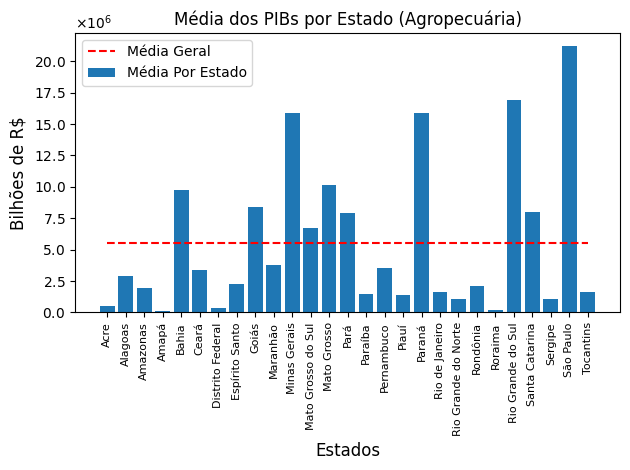

In [18]:
fig, xb = plt.subplots()

xb.bar(pib_pos_1988.columns, media_por_estado.values)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6,6))
xb.yaxis.set_major_formatter(formatter)


plt.plot(pib_pos_1988.columns, [media_geral for _ in range(len(pib_pos_1988.columns))], "r--")
plt.title("Média dos PIBs por Estado (Agropecuária)")
plt.legend(["Média Geral", "Média Por Estado"])

plt.xlabel("Estados", fontsize=12)
plt.ylabel("Bilhões de R$", fontsize=12)

plt.xticks([i for i, _ in enumerate(pib_pos_1988.columns)], pib_pos_1988.columns, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

Alguns estados estão com uma média bem maior que outros. Isso não necessáriamente significa que há erros. É possível que o tamanho da população e a quantiadade de bens de alto valor agregado que circula interfira fortemente nessas médias ao longo dos anos.

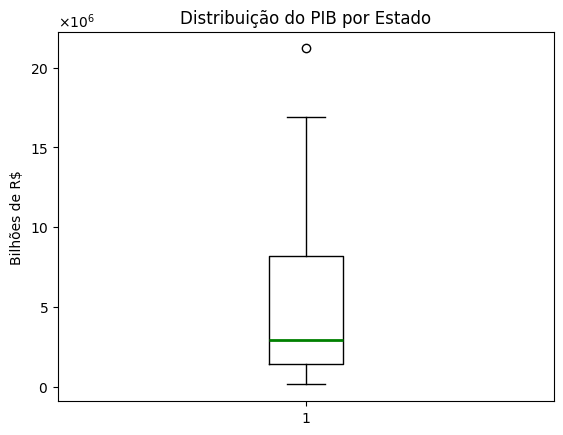

In [19]:
# Box plot para confirmar a distribuição
_, xb = plt.subplots()
xb.yaxis.set_major_formatter(formatter)
xb.boxplot(media_por_estado, medianprops={ "color": "green", "linewidth": 2 })
plt.title("Distribuição do PIB por Estado")
xb.set_ylabel("Bilhões de R$")
plt.show()

O Box Plot confirma a distribuição desigual de produção agropecuária nos estados e indica um outlier. Observando o gráfico anterior juntamente com esse, é possível perceber que o outlier é São Paulo. Isso provavelmete ocorre pela grande circulação de bens e serviços do estado.

Entre os estados, a discrepância de valores se justifica pelas especificidades econômicas de cada um, o tamanho de suas populações e a quantidade de centros urbanos. Tendo isso verificado, vale a pena observar os valores dos estados entre os anos para verificar se não há dados discrepantes entre os anos.

In [20]:
pib_pos_1988
quartis = pib_pos_1988.quantile([0.25, 0.5, 0.75])

interquartil = quartis.loc[0.75] - quartis.loc[0.25]
outlier_upper_limit = quartis.loc[0.75] + 1.5 * interquartil
outlier_bottom_limit = quartis.loc[0.25] - 1.5 * interquartil

transposed_pib = pib_pos_1988.transpose()

transposed_pib['Outlier Upper Limit'] = outlier_upper_limit
transposed_pib['Outlier Bottom Limit'] = outlier_bottom_limit
transposed_pib

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,Outlier Upper Limit,Outlier Bottom Limit
Acre,233791.012498,169594.89767,153797.333681,66121.740701,76104.566861,84315.086886,96633.231958,84764.79137,59707.644311,66134.402401,...,923403.269084,924750.593818,821308.700676,709515.95527,587129.627902,519022.524699,1723605.417278,2007001.481081,1842039.856997,-954394.571016
Alagoas,3077828.852538,3205864.376549,1669929.222033,882222.242462,544381.043128,1085349.509754,766731.807539,504252.126022,527847.971413,651166.223258,...,3337332.42977,4283423.658563,5197034.423907,4758059.976493,5315221.719039,6660980.626759,7973781.882265,4966470.706589,7688555.824102,-3120326.999605
Amazonas,2618108.799509,2588857.927622,1369402.065003,624871.281588,411675.803179,549678.500764,379061.02278,274252.703655,297873.079575,377443.938117,...,3973129.585878,3730174.107127,3429211.208565,3229545.899081,2792752.462146,2698960.717523,2668287.843792,2445522.497746,6070546.271021,-2732765.049061
Amapá,372950.578036,156878.355086,137465.464924,71855.857533,75433.915466,139435.915455,131396.027038,152749.846302,92416.081701,91944.545173,...,184748.272916,183645.951917,190245.991318,172173.994757,174925.588201,179372.781242,164103.989497,104737.684572,332607.284432,-48474.911432
Bahia,18693935.239808,9411873.159644,4224823.100245,4099548.803004,4152732.42481,5797502.750902,5181877.594519,4988218.111403,4819093.725243,4082387.083027,...,12244426.774188,10488786.288379,9684739.960389,11182638.621899,9826032.84239,14779621.437652,16136617.801809,17222021.842731,22856379.020171,-5655214.640611
Ceará,5096060.416194,4363648.287461,4247090.016543,1929951.285688,1425938.547493,2308000.409188,1726089.100026,1850894.587997,1269199.12645,1155184.953227,...,3537662.584648,3628913.08162,4581809.994237,4153276.35468,4135406.139545,5018012.47439,4932373.628186,4636006.039336,7714436.183304,-1389520.003482
Distrito Federal,264653.616472,307955.97,780358.704971,186264.915924,179465.687052,295943.832045,128604.3655,133661.874733,139102.564603,163882.72036,...,429781.784847,520673.927553,506860.441273,598891.860752,557595.539679,856993.61342,1083544.946336,596895.800339,987715.273078,-266937.305841
Espírito Santo,6193811.97871,2086614.717112,2084982.230974,956394.927005,1171579.582796,1941250.570932,1454668.697718,1652685.746126,1284128.165335,1503688.404776,...,2592746.017861,2707968.792443,2745932.904259,2566802.129073,2332818.764764,2756413.34874,3323592.222559,3767784.556474,4327794.48639,-68555.880524
Goiás,4145061.623812,4922679.140756,2212393.034119,2078197.720364,2912127.584715,3492932.423422,3017815.683595,2766712.380489,2808141.542885,3059982.519044,...,11046295.195898,12514946.32138,11885297.065799,11656674.456013,11898315.145459,15315580.9079,20106673.698734,22706970.682239,23937403.819818,-8888197.955534
Maranhão,5019630.931397,3343230.878123,2960665.31102,1243961.82557,1028790.102374,1712097.649912,1555569.059412,2097831.433142,1882506.899779,1284671.160708,...,4966697.614751,3836793.1408,4594684.753911,4555288.176804,4114217.493305,6106930.63056,6579053.355488,7234182.959308,8937805.418665,-2264542.398207


In [21]:
std_frame = pd.DataFrame(columns=["Estado", "Desvio Padrão (bilhões)"], data=[])
std_frame["Estado"] = pib_pos_1988.columns
std_series = (pib_pos_1988.std() / 1e6).astype('float64').round(2)
std_frame["Desvio Padrão (bilhões)"] = std_series.values
std_frame


,Estado,Desvio Padrão (bilhões)
0,Acre,0.46
1,Alagoas,1.88
2,Amazonas,1.28
3,Amapá,0.06
4,Bahia,4.12
5,Ceará,1.33
6,Distrito Federal,0.22
7,Espírito Santo,0.96
8,Goiás,5.18
9,Maranhão,1.72


Existem estados que possuem um desvio padrão que não é despresível, como Mato Grosso ou Minas Gerais. Portanto, temos um indicativo da presença de outliers ou valores amplamente distribuídos nos estados. Para avaliar isso melhor, podemos buscar por outliers dentro de cada estado. 

In [22]:
# upper_outlier_rows = (pib_pos_1988 > transposed_pib['Outlier Upper Limit']).any(axis=1) # Upper outliers lines
# upper_outlier_cols = (pib_pos_1988 > transposed_pib['Outlier Upper Limit']).any(axis=0) # Upper outliers cols

# upper_outliers_index = [index for index in upper_outlier_rows.index if upper_outlier_rows[index] == True]
# upper_outliers_collum = [index for index in upper_outlier_cols.index if upper_outlier_cols[index] == True]

# upper_outliers_index
# upper_outlier_cols

# transposed_pib.loc[upper_outliers_collum, upper_outliers_index] #! aqui ainda não estão os outliers completamente definidos, ainda precisa de um filtro melhor

upper_outlier_matrix = pib_pos_1988 > transposed_pib['Outlier Upper Limit']
upper_outlier_mask = pib_pos_1988.where(upper_outlier_matrix, axis=0)

upper_outliers = upper_outlier_mask.stack()
upper_outliers

limits_list = transposed_pib.loc[[index[1] for index in upper_outliers.index], 'Outlier Upper Limit']

upper_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(upper_outliers.index, upper_outliers.values, limits_list)]
upper_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "PIB (bilhões)", "Upper Limit (bilhões)"], data=upper_outlier_data)
upper_outlier_frame["PIB (bilhões)"] = round(upper_outlier_frame["PIB (bilhões)"] / 1e6, 2)
upper_outlier_frame["Upper Limit (bilhões)"] = round(upper_outlier_frame["Upper Limit (bilhões)"] / 1e6, 2)
upper_outlier_frame 


,Ano,Estado,PIB (bilhões),Upper Limit (bilhões)
0,1989,Amapá,0.37,0.33
1,1989,Espírito Santo,6.19,4.33
2,1989,Minas Gerais,36.43,33.91
3,1989,Pará,19.62,16.28
4,1989,Paraíba,3.94,1.85
5,1989,Rio de Janeiro,4.09,3.33
6,1989,Rio Grande do Norte,4.12,2.54
7,1989,Santa Catarina,19.77,15.63
8,1989,São Paulo,35.10,29.93
9,1990,Paraíba,2.55,1.85


In [23]:
bottom_outlier_matrix = pib_pos_1988 < transposed_pib['Outlier Bottom Limit']
bottom_outlier_mask = pib_pos_1988.where(bottom_outlier_matrix, axis=0)

bottom_outliers = bottom_outlier_mask.stack()
bottom_outliers

limits_list = transposed_pib.loc[[index[1] for index in bottom_outliers.index], 'Outlier Bottom Limit']

bottom_outlier_data = [(index[0], index[1], pib, limit) for index, pib, limit in zip(bottom_outliers.index, bottom_outliers.values, limits_list)]
bottom_outlier_frame = pd.DataFrame(columns=["Ano", "Estado", "PIB (bilhões)", "Bottom Limit (bilhões)"], data=bottom_outlier_data)
bottom_outlier_frame["PIB (bilhões)"] = round(bottom_outlier_frame["PIB (bilhões)"] / 1e6, 2)
bottom_outlier_frame["Bottom Limit (bilhões)"] = round(bottom_outlier_frame["Bottom Limit (bilhões)"] / 1e6, 2)
bottom_outlier_frame 

,Ano,Estado,PIB (bilhões),Bottom Limit (bilhões)
0,1992,Paraíba,0.87,0.99
1,1993,Paraíba,0.80,0.99
2,1998,Paraíba,0.76,0.99
3,1999,Paraíba,0.93,0.99


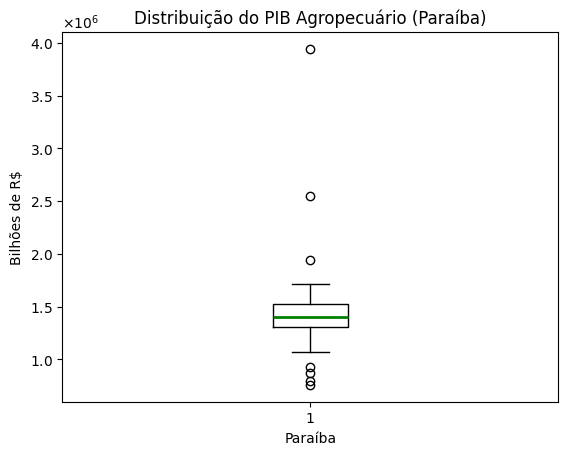

In [24]:
# Gerar pelo menos 1 box plot pra comprovar os outliers (do que tiver menos outliers)
_, xb = plt.subplots()
xb.boxplot(pib_pos_1988['Paraíba'], medianprops={"color": "g", "linewidth": 2})

xb.yaxis.set_major_formatter(formatter)

xb.set_ylabel("Bilhões de R$")
xb.set_xlabel("Paraíba")

plt.title("Distribuição do PIB Agropecuário (Paraíba)")
plt.show()

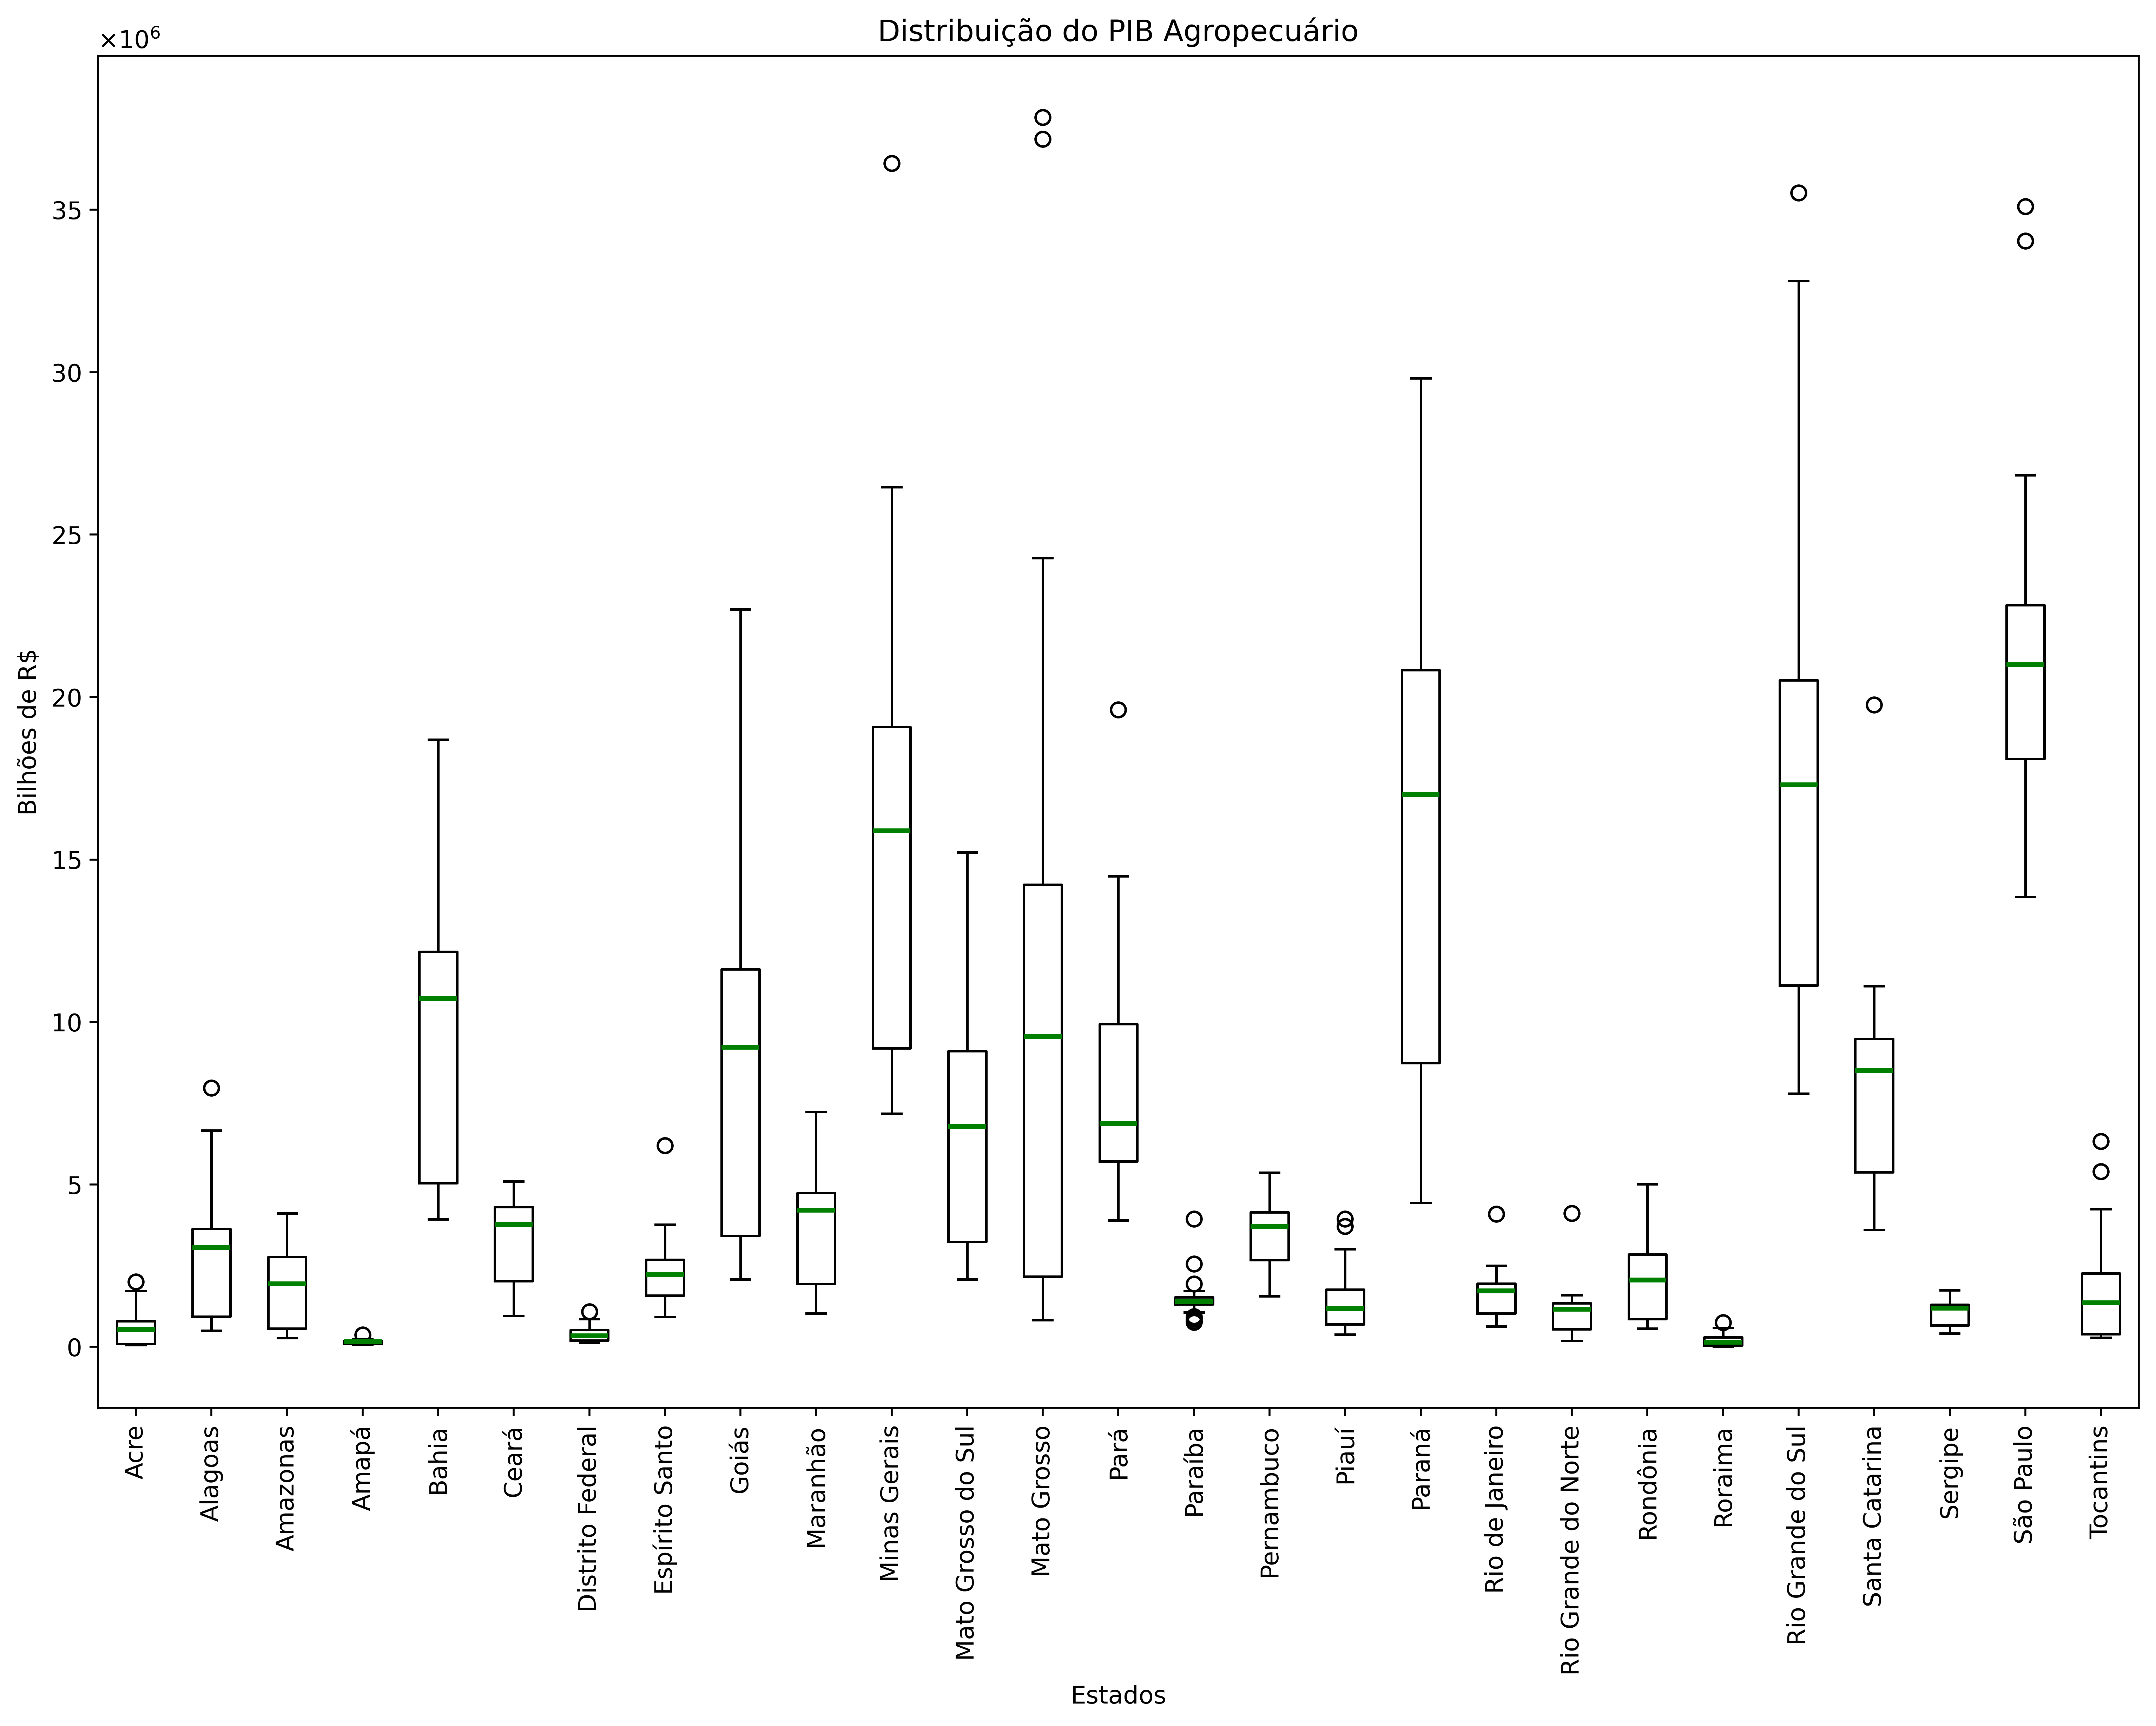

In [25]:
plt.figure(figsize=(15, 10), dpi=500)

plt.boxplot(pib_pos_1988, medianprops={"color": "g", "linewidth": 2})

plt.ticklabel_format(axis='y', useMathText=True, scilimits=(6, 6))
plt.ylabel("Bilhões de R$")
plt.xlabel("Estados")

plt.xticks([i + 1 for i, _ in enumerate(pib_pos_1988.columns)], pib_pos_1988.columns, rotation=90)



plt.title("Distribuição do PIB Agropecuário")
plt.show()

Como é possível perceber, há uma quantidade considerável de outliers, que devem ser considerados durante a análise do usuário final. Acreditamos que não seja necessário fazer sua remoção, dado que o que se busca observar é o aumento do PIB em relação ao desmatamento. Dessa forma, os outliers podem ser um indicativo relevante para o entendimento da situação.

In [26]:
#! Testde de erros de digitação no nome dos estados (nomes unique)
#! Dados muito mais altos podem gerar problemas de plotagem